
To calcualte moving average of a stock

In [2]:
import pandas as pd
import yfinance as yf

# Define the ticker symbol
ticker = 'HDFCBANK.NS'

# Get today's date
today = pd.Timestamp.today()

# Calculate the start date (1 year ago from today)
start = today - pd.DateOffset(years=1)

# Download stock data for the ticker
data = yf.download(tickers=ticker, start=start, end=today)

# Save the data to an Excel file
data.to_excel('stock_data.xlsx', index=True)

# Load the data from the Excel file, setting 'Date' as the index and parsing dates
df = pd.read_excel('stock_data.xlsx', index_col='Date', parse_dates=True)

# Display the first few rows to verify
print(df.head())


[*********************100%***********************]  1 of 1 completed


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-10-11  1530.099976  1542.150024  1528.500000  1539.599976  1518.859253   
2023-10-12  1536.099976  1552.000000  1531.599976  1549.849976  1528.971191   
2023-10-13  1540.000000  1548.800049  1529.949951  1535.750000  1515.061157   
2023-10-16  1531.500000  1534.449951  1520.500000  1529.599976  1508.994019   
2023-10-17  1555.750000  1555.750000  1535.000000  1541.199951  1520.437744   

              Volume  
Date                  
2023-10-11  15666680  
2023-10-12  11012668  
2023-10-13  19872650  
2023-10-16   8928042  
2023-10-17  16451279  


1. Moving Average Chart (20 days and 50 days)

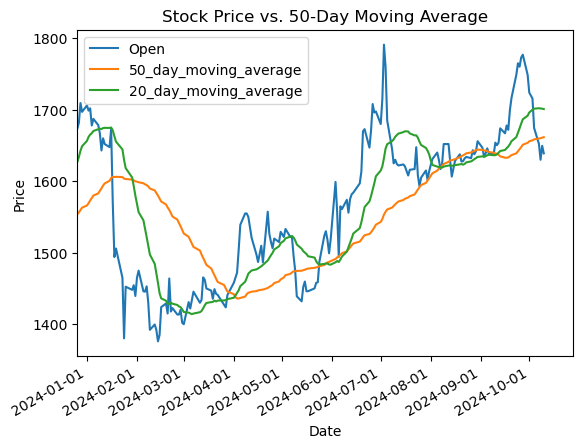

In [3]:
##to read excel file and convert to dataframe   

df = pd.read_excel('stock_data.xlsx')

df_plot = df.copy()

df_plot['50_day_moving_average'] = df_plot['Open'].rolling(window=50).mean()

df_plot['20_day_moving_average'] = df_plot['Open'].rolling(window=20).mean()


import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df_plot.plot(kind='line',x='Date', y=['Open','50_day_moving_average','20_day_moving_average'])

start_date = df_plot['Date'].iloc[50]  # Get the date of the 50th row

# Set x-axis limits (excluding the first 50 rows)

plt.xlim(start_date, None)  # Set the start date 
date_format = mdates.DateFormatter('%Y-%m-%d') 
plt.gca().xaxis.set_major_formatter(date_format)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price vs. 50-Day Moving Average')
plt.legend()
plt.show()  # Display the plot

2. Daily Returns histogram 

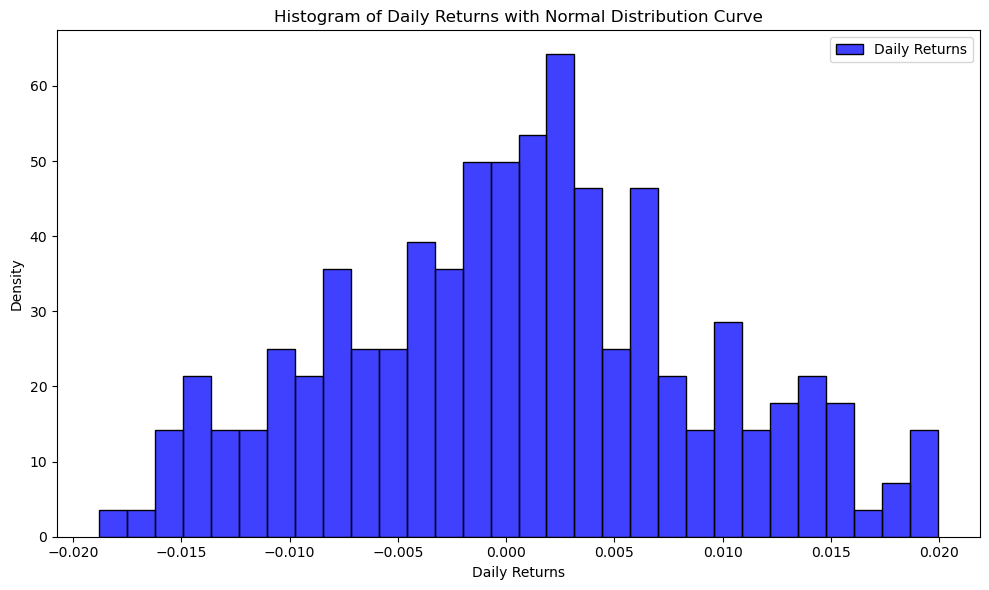

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('stock_data.xlsx')

# Calculate daily returns
df['Daily_Returns'] = df['Close'].pct_change()

# Drop missing values 
df.dropna(inplace=True)

min_value = -0.02
max_value = 0.02

df_fil = df[(df['Daily_Returns'] > min_value ) & (df['Daily_Returns'] < max_value )]

# Plotting the histogram of daily returns
plt.figure(figsize=(10, 6))

sns.histplot(df_fil['Daily_Returns'], bins=30, kde=False, stat='density', color='blue', label='Daily Returns')

plt.title('Histogram of Daily Returns with Normal Distribution Curve')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()


plt.tight_layout()
plt.show()

# Need to learn -------------------------------------------

# Fit and plot the normal distribution curve 
# mu, std = norm.fit(df['Daily_Returns'])  # Mean and standard deviation of the returns
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)  # PDF (Probability Density Function) of the normal distribution
# plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')





In [48]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily_Returns
1,2023-10-06,1544.000000,1545.000000,1529.849976,1534.050049,1513.384155,8879678,-0.001107
2,2023-10-09,1528.000000,1530.000000,1512.000000,1516.250000,1495.823853,8227486,-0.011603
3,2023-10-10,1520.550049,1529.000000,1515.199951,1524.849976,1504.307983,16633146,0.005672
4,2023-10-11,1530.099976,1542.150024,1528.500000,1539.599976,1518.859253,15666680,0.009673
5,2023-10-12,1536.099976,1552.000000,1531.599976,1549.849976,1528.971191,11012668,0.006658
...,...,...,...,...,...,...,...,...
240,2024-09-27,1777.000000,1778.199951,1750.000000,1752.650024,1752.650024,17806751,-0.017270
241,2024-09-30,1748.800049,1751.449951,1724.400024,1732.050049,1732.050049,13191767,-0.011754
242,2024-10-01,1724.000000,1742.000000,1720.099976,1726.199951,1726.199951,12286142,-0.003378
243,2024-10-03,1715.650024,1726.150024,1673.349976,1682.000000,1682.000000,24236699,-0.025605


3. Volume vs. Price Chart:

Text(0.5, 0, 'Date')

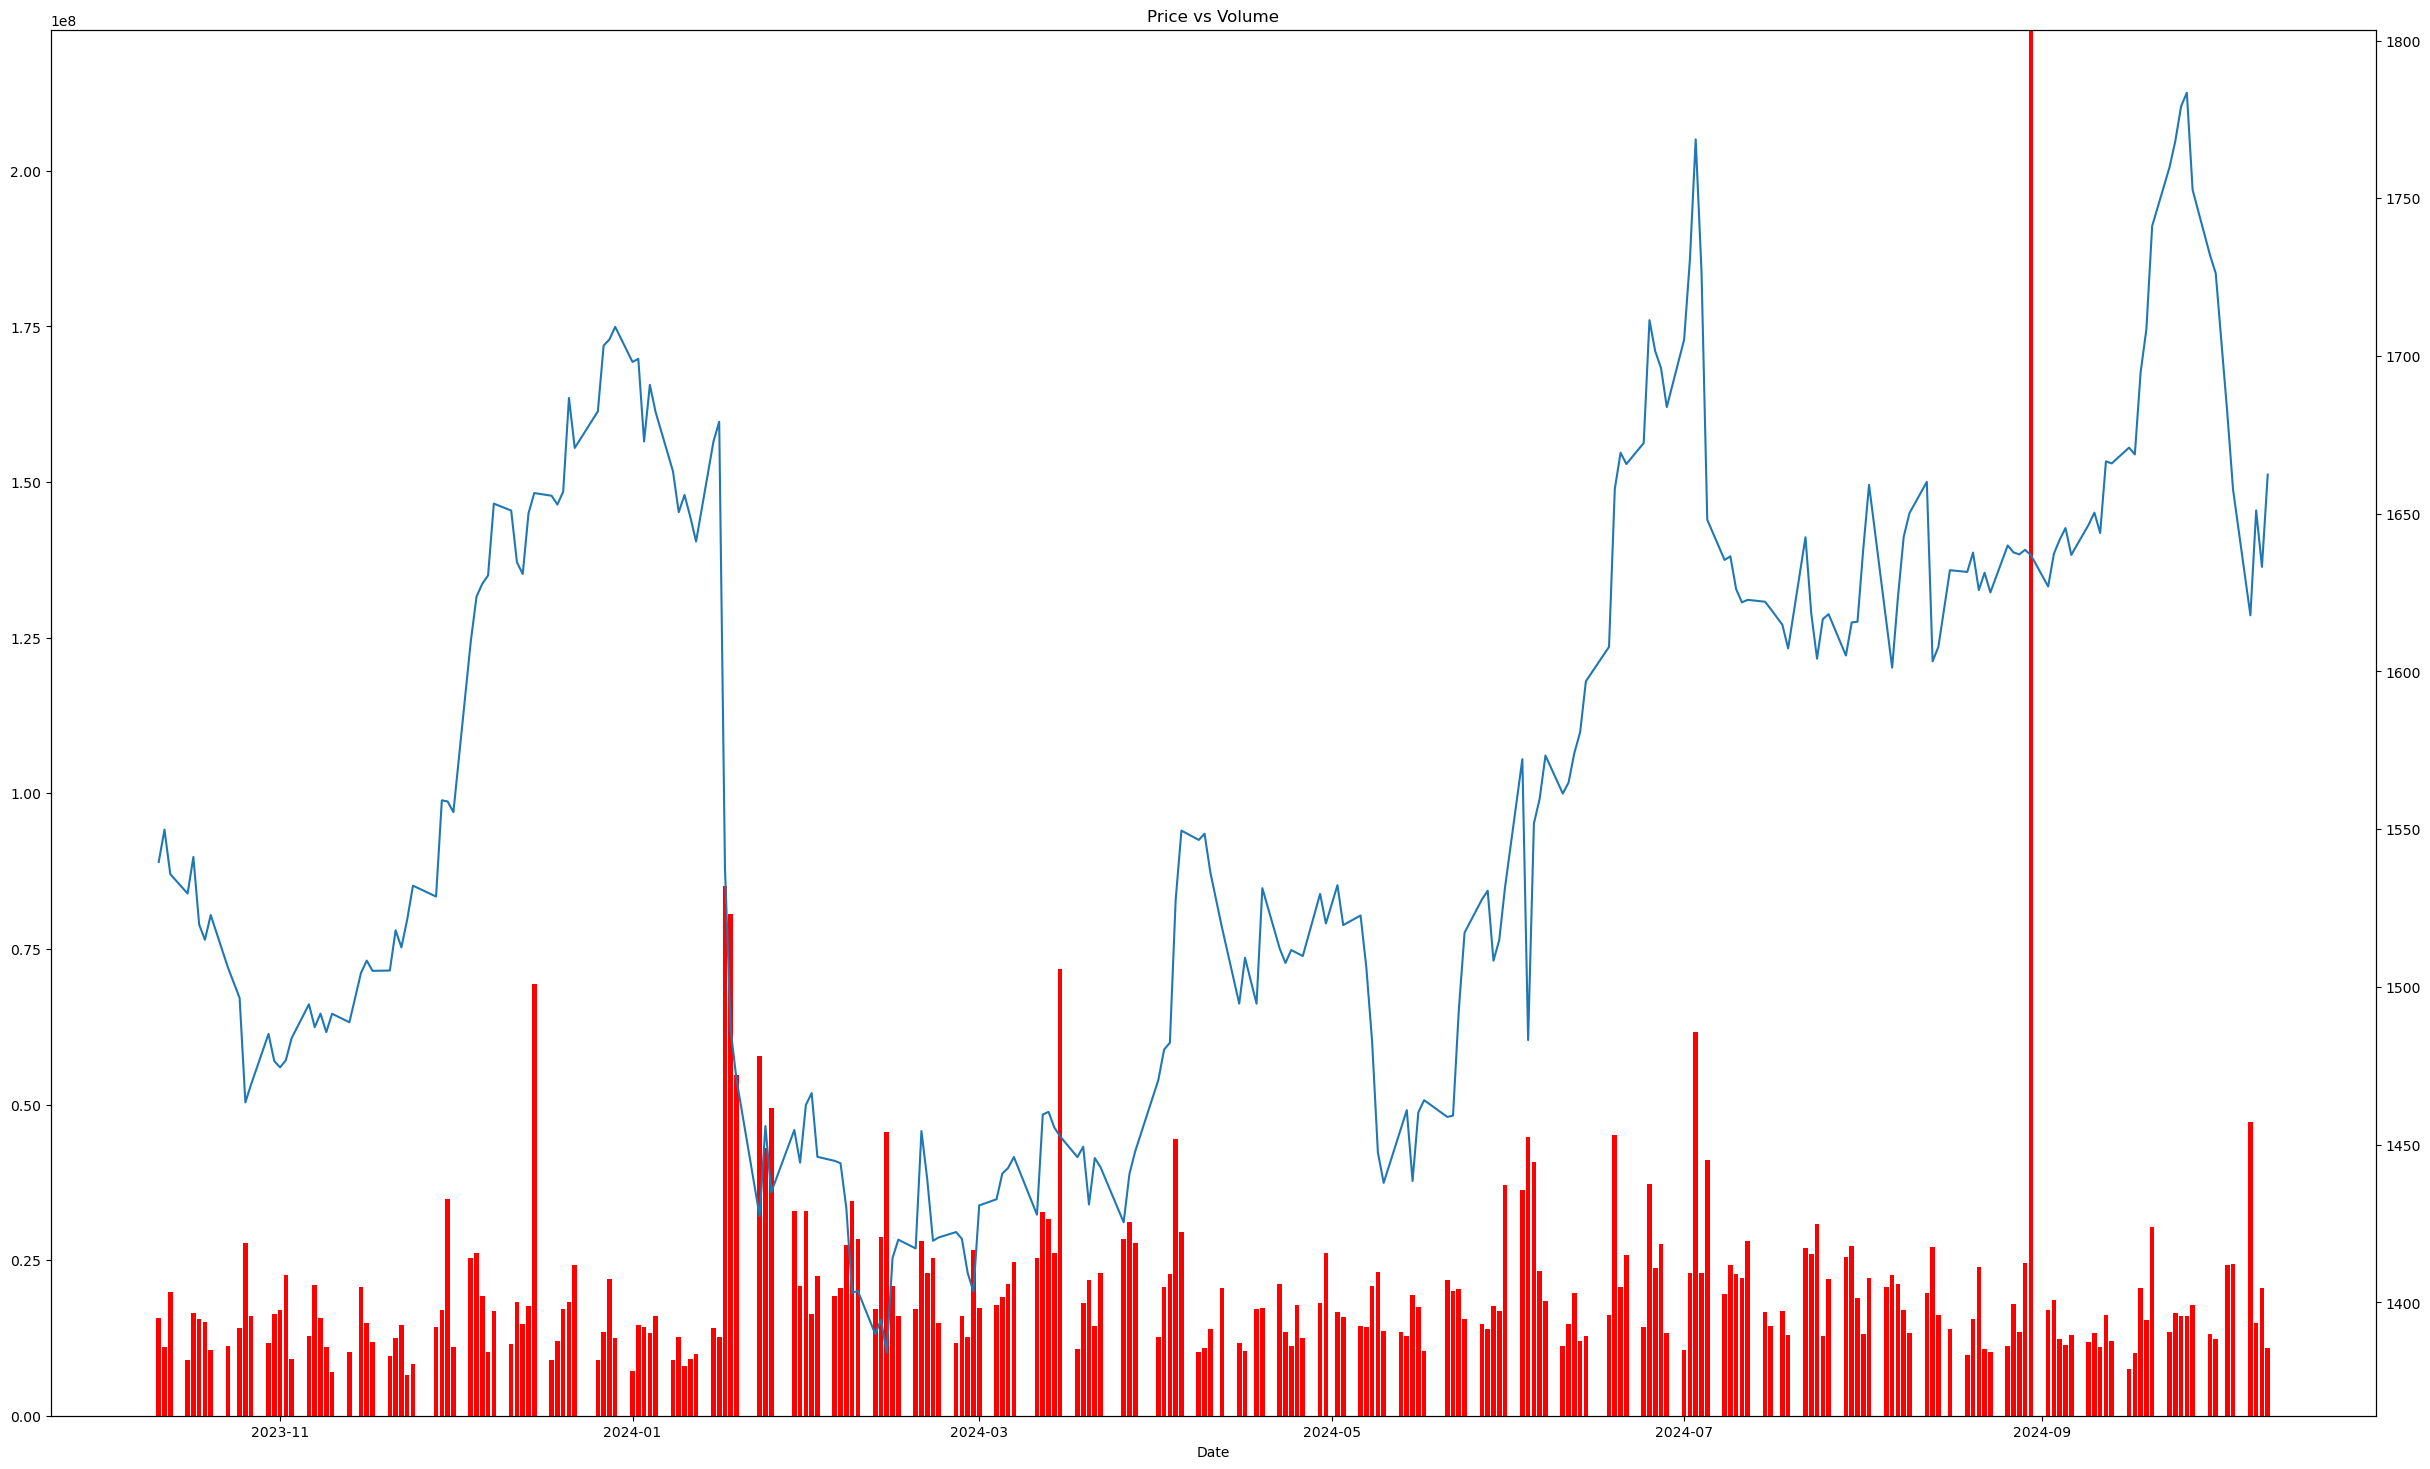

In [5]:


import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Loading data
df = pd.read_excel('stock_data.xlsx')
# converting column into datetime
df['Date'] = pd.to_datetime(df['Date'])
#create and adjust size
fig, ax = plt.subplots(figsize=(30, 18))
# Bar chart of volume
ax.bar(df['Date'], df['Volume'], label='volume',color='red')
plt.title('Price vs Volume')
plt.ylim(0, df['Volume'].max())

ax1 = ax.twinx() 
ax1.plot(df['Date'], df['Close'], label='Close Price')
ax.set_xlabel('Date')


